In [33]:
import numpy as np
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense, Convolution3D, MaxPooling3D, UpSampling3D, Flatten, Reshape
from keras.models import Model, Sequential
import keras.optimizers
from CAE_input_data import getTempData
from sklearn.model_selection import train_test_split
from datetime import datetime
from keras.callbacks import TensorBoard


np.random.seed(42)
A,B,C,D = 29,15,45,65
L = 4

data, temps = getTempData(num_data_points=100,L=L)

data = data.reshape(len(data)/12800,12800)
data = np.asarray([item.reshape(4,4,4,200).swapaxes(1,2).swapaxes(1,2) for item in data])
print len(data),len(temps)

################################################
new_data = []
new_temps = []
for d, t in zip(data,temps):
    for i in range(2):
        temp = np.roll(d,64*(i*100))
        
        new_data.append(temp)
        new_data.append(temp[::-1])
        
        new_temps.append(t)
        new_temps.append(t)
#############################################
#     print len(new_data), len(new_temps)

data = np.asarray(new_data)
temps = np.asarray(new_temps)

print len(data),len(temps), len(new_data), len(new_temps)
new_data, new_temps = [], []
print len(data),len(temps), len(new_data), len(new_temps)


temps_test = []
temps_train = []
data_test = []
data_train = []

for i in range(len(temps)):
    if temps[i] <= 0.5 and temps[i] >= 0.2:
        temps_train.append(temps[i])
        data_train.append(data[i])
        
    else:
        temps_test.append(temps[i])
        data_test.append(data[i])

print len(temps_train), len(data_train), len(temps_test), len(data_train)
temps_train = np.asarray(temps_train)
data_train = np.asarray(data_train)
temps_test = np.asarray(temps_test)
data_test = np.asarray(data_test)


### usual style
# X_train, X_test, y_train, y_test = train_test_split(data, temps, test_size=.3, random_state=42, stratify=temps)

X_train, X_test, y_train, y_test = train_test_split(data_train, temps_train, test_size=.3, random_state=42, stratify=temps_train)


data, temps = [], []
print len(data),len(temps), len(new_data), len(new_temps)

del data, temps, new_data, new_temps, item, d, t, temp

5100 5100
20400 20400 20400 20400
20400 20400 0 0
12400 12400 8000 12400
0 0 0 0


In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

In [34]:
input_data = Input(shape=(4,4,4,200,))
x = Convolution3D(A,(2,2,2), padding='same', activation='relu')(input_data)
x = Convolution3D(A,(1,1,1), padding='same', activation='relu')(x)
x = MaxPooling3D(pool_size=(2,2,2), padding='same')(x)
x = Convolution3D(B,(2,2,2), padding='same', activation='relu')(x)
x = Convolution3D(B,(1,1,1), padding='same', activation='relu')(x)
x = MaxPooling3D(pool_size=(2,2,2), padding='same')(x)
x = Convolution3D(C,(1,1,1), padding='same', activation='relu')(x)
x = Flatten()(x)
x = Dense(D)(x)
encoder = Dense(2, name='code')(x)


middle_layer_output = Input(shape=(2,))
x = Dense(D)(middle_layer_output)
x = Reshape([1,1,1,D])(x)
x = Convolution3D(C,(1,1,1), padding='same', activation='relu')(x)
x = UpSampling3D(size=(2,2,2))(x)
x = Convolution3D(B,(2,2,2), padding='same', activation='relu')(x)
x = UpSampling3D(size=(2,2,2))(x)
x = Convolution3D(A,(2,2,2), padding='same', activation='relu')(x)
output = Convolution3D(200,(2,2,2), padding='same', activation='relu')(x)

encoder = Model(input_data, encoder)

decoder = Model(middle_layer_output, output)

autoencoder = Model(encoder.input, decoder(encoder.output))


now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"; logdir = "{}/run{}_ABCD{}_{}_{}_{}/".format(root_logdir, now,A,B,C,D)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae','accuracy'])
autoencoder.fit(X_train, X_train, epochs=50, batch_size=50,
                validation_data=(X_test, X_test),
                shuffle=True,
                callbacks=[TensorBoard(log_dir=logdir)],
                verbose=1)

Train on 8680 samples, validate on 3720 samples
Epoch 1/50
8680/8680 [==============================] - 32s - loss: 0.9584 - mean_absolute_error: 0.5029 - acc: 0.5024 - val_loss: 0.7374 - val_mean_absolute_error: 0.4981 - val_acc: 0.5179
Epoch 2/50
8680/8680 [==============================] - 33s - loss: 0.7341 - mean_absolute_error: 0.4980 - acc: 0.5222 - val_loss: 0.7323 - val_mean_absolute_error: 0.4975 - val_acc: 0.5274
Epoch 3/50
8680/8680 [==============================] - 38s - loss: 0.7318 - mean_absolute_error: 0.4978 - acc: 0.5275 - val_loss: 0.7313 - val_mean_absolute_error: 0.4980 - val_acc: 0.5280
Epoch 4/50
8680/8680 [==============================] - 37s - loss: 0.7312 - mean_absolute_error: 0.4978 - acc: 0.5298 - val_loss: 0.7309 - val_mean_absolute_error: 0.4980 - val_acc: 0.5294
Epoch 5/50
8680/8680 [==============================] - 36s - loss: 0.7309 - mean_absolute_error: 0.4978 - acc: 0.5310 - val_loss: 0.7307 - val_mean_absolute_error: 0.4978 - val_acc: 0.5312
Ep

8680/8680 [==============================] - 32s - loss: 0.7304 - mean_absolute_error: 0.4977 - acc: 0.5332 - val_loss: 0.7303 - val_mean_absolute_error: 0.4978 - val_acc: 0.5333
Epoch 44/50
8680/8680 [==============================] - 32s - loss: 0.7304 - mean_absolute_error: 0.4977 - acc: 0.5333 - val_loss: 0.7303 - val_mean_absolute_error: 0.4976 - val_acc: 0.5334
Epoch 45/50
8680/8680 [==============================] - 31s - loss: 0.7304 - mean_absolute_error: 0.4977 - acc: 0.5333 - val_loss: 0.7303 - val_mean_absolute_error: 0.4976 - val_acc: 0.5334
Epoch 46/50
8680/8680 [==============================] - 32s - loss: 0.7304 - mean_absolute_error: 0.4977 - acc: 0.5333 - val_loss: 0.7303 - val_mean_absolute_error: 0.4975 - val_acc: 0.5335
Epoch 47/50
8680/8680 [==============================] - 32s - loss: 0.7304 - mean_absolute_error: 0.4977 - acc: 0.5333 - val_loss: 0.7303 - val_mean_absolute_error: 0.4977 - val_acc: 0.5334
Epoch 48/50
8680/8680 [==============================] - 

In [ ]:
# serialize model to JSON
model_json = encoder.to_json()
with open("encoder.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
encoder.save_weights("encoder.h5")
print("Saved model to disk")

# serialize model to JSON
model_json = decoder.to_json()
with open("decoder.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
decoder.save_weights("decoder.h5")
print("Saved model to disk")

# serialize model to JSON
model_json = autoencoder.to_json()
with open("autoencoder.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("autoencoder.h5")
print("Saved model to disk")

In [1]:
from keras.models import model_from_json

# load json and create model
json_file = open('encoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
encoder = model_from_json(loaded_model_json)
# load weights into new model
encoder.load_weights("encoder.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
encoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse'])



# load json and create model
json_file = open('decoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
decoder = model_from_json(loaded_model_json)
# load weights into new model
decoder.load_weights("decoder.h5")
print("Loaded model from disk") 
# evaluate loaded model on test data
decoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse'])



# load json and create model
json_file = open('autoencoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
# load weights into new model
autoencoder.load_weights("autoencoder.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse'])

Using TensorFlow backend.


Loaded model from disk
Loaded model from disk
Loaded model from disk


In [35]:
train_output = encoder.predict(X_train)
test_output = encoder.predict(X_test)

other_predict = encoder.predict(data_test)

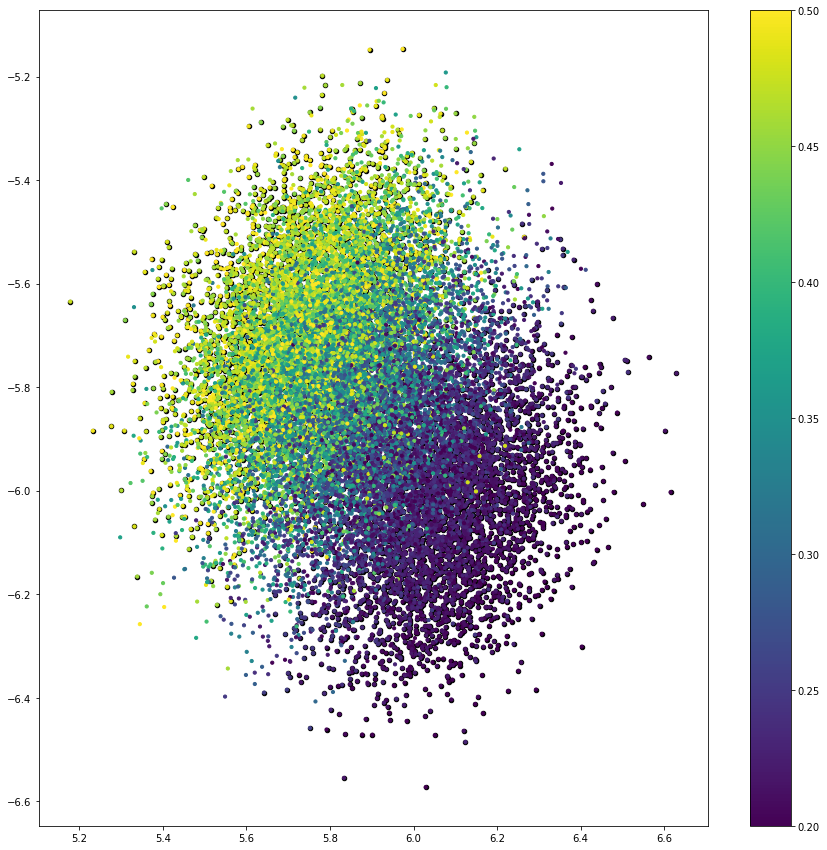

,T,x,y
0,0.40,5.766029,-5.811010
1,0.33,5.984492,-5.931203
2,0.32,5.737792,-5.980443
3,0.38,5.684593,-5.870900
4,0.21,5.971687,-5.990363


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure(figsize=(15,15))

plt.scatter(other_predict[:,0], other_predict[:,1], c='black',s=20)
plt.scatter(other_predict[:,0], other_predict[:,1], c=temps_test,s=10)


x1, y1 = train_output[:,0], train_output[:,1]
plt.scatter(x1,y1,c=y_train,s=10)
x2, y2 = test_output[:,0], test_output[:,1]
plt.scatter(x2,y2,c=y_test,s=10)
plt.colorbar()
df = pd.DataFrame({'x':x1,'y':y1,'T':y_train})
df.append(pd.DataFrame({'x':x2,'y':y2,'T':y_test}))



plt.show()

df.head()

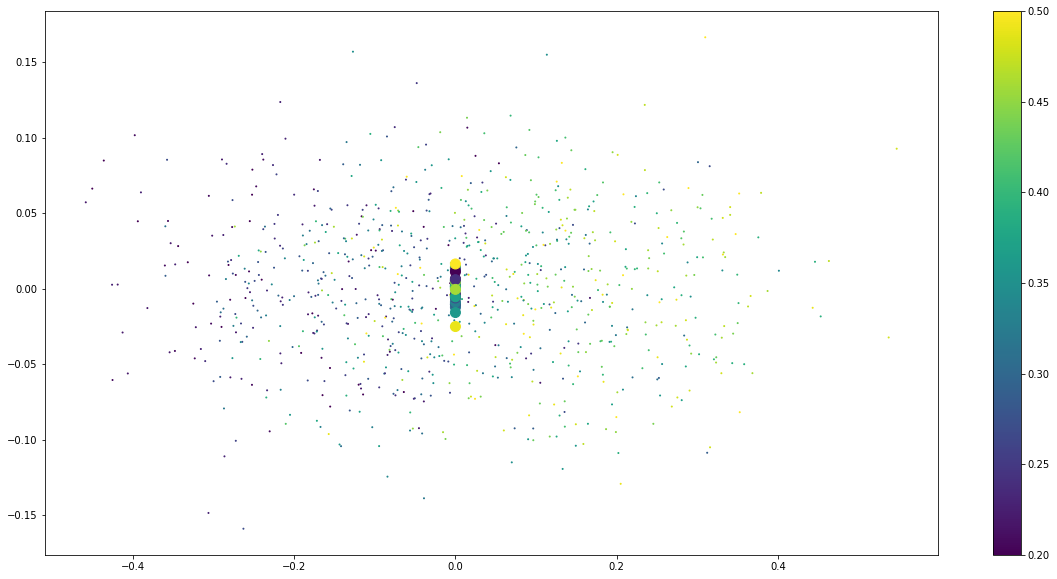

In [32]:
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.cm as cm

X = df[['x','y']].values
pca = PCA(n_components=2, random_state=42)
pca.fit(X)

newX = pd.DataFrame(pca.transform(X))
newX.columns = ['x','y']
newX['T'] = df['T']

plt.figure(figsize=(20,10))
plt.scatter(newX['x'],newX['y'],c=newX['T'],s=1)
# plt.hist2d(newX['x'],newX['y'],c=newX['T'],s=10)

plt.colorbar()

norm = mpl.colors.Normalize(vmin=min(df['T']),vmax=max(df['T']))
cmap0 = cm.viridis
m0 = cm.ScalarMappable(norm=norm, cmap=cmap0)

# plt.show()
# plt.figure(figsize=(5,20))

for T in newX['T'].unique():
    tempDF = newX[newX['T'] == T]
    
    meanX = tempDF['x'].mean()
    stdX = tempDF['x'].std()
    
    meanY = tempDF['y'].mean()
    stdY = tempDF['y'].std()
    
    stdX = round(stdX, 2)
#     print stdX
#     stdY = round(stdY, 2)
    plt.scatter([0],meanY, c=m0.to_rgba(tempDF['T']),s=100)
#     plt.scatter(meanX, 0, c=m0.to_rgba(tempDF['T']),s=100)
#     plt.errorbar(meanX, 0, xerr=stdX, yerr=stdY, ecolor=m0.to_rgba(tempDF['T']))

#     plt.scatter(meanX,0, c=m0.to_rgba(tempDF['T']))

#     plt.text(3,meanY, r'${}$'.format(T))
#     plt.text(3,meanY, r'${}$'.format(T))

# other_predict = pca.transform(other_predict)
# plt.scatter(other_predict[:,0], other_predict[:,1], c=temps_test,s=10)
# plt.scatter(other_predict[:,0], other_predict[:,1], c='black',s=20)



# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [ ]:
np.random.seed(42)
num_pts = 100
trialsX = np.random.randn(num_pts)
trialsY = np.random.randn(num_pts)

xmean, ymean = 0,1
std = 0.5

trialsX = trialsX * std + xmean
trialsY = trialsY * std + ymean
trials = np.asarray(zip(trialsX,trialsY))

trialsFix = pca.inverse_transform(trials)
trialDecode = decoder.predict(trialsFix)
trialEncode = encoder.predict(trialDecode)
trialEncode = pca.transform(trialEncode)

plt.figure(figsize=(15,15))
plt.scatter(newX['x'],newX['y'],c=newX['T'],s=1)

plt.scatter(trials[:,0],trials[:,1],c='r',s=10)
plt.scatter(trialEncode[:,0],trialEncode[:,1],c='orange',s=10)

trialsFix2 = pca.inverse_transform(trialEncode)
trialDecode2 = decoder.predict(trialsFix2)
trialEncode2 = encoder.predict(trialDecode2)
trialEncode2 = pca.transform(trialEncode2)

plt.scatter(trialEncode2[:,0],trialEncode2[:,1],c='green',s=10)




for i in range(len(trials)):
    plt.plot([trials[:,0][i],trialEncode[:,0][i]],[trials[:,1][i],trialEncode[:,1][i]],
             color='black',alpha=0.5,linestyle='--')

    plt.plot([trialEncode[:,0][i],trialEncode2[:,0][i]],[trialEncode[:,1][i],trialEncode2[:,1][i]],
             color='black',alpha=0.5,linestyle='--')


plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer


mlb = MultiLabelBinarizer()
oneHot = mlb.fit_transform(newX[['T']].values)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(newX[['x','y']].values, oneHot)



In [ ]:
from keras.utils import plot_model
encoder.summary()
plot_model(encoder,'encoder.png',show_shapes=True)
decoder.summary()
plot_model(decoder,'decoder.png',show_shapes=True)
autoencoder.summary()
plot_model(autoencoder,'autoencoder.png',show_shapes=True)

In [ ]:
data, temps = getTempData(num_data_points=3,L=L)

data = data.reshape(len(data)/12800,12800)

new_data = []
new_temps = []
for d, t in zip(data,temps):
#     new_data.append(d)
    for i in range(200):
#     new_data.append(d[::-1])
        temp = np.roll(d,64*i)
        
        new_data.append(temp)
        new_data.append(temp[::-1])
# new_data.append(np.roll(d,64*200))
        new_temps.append(t)
        new_temps.append(t)



In [ ]:
data2 = np.asarray([item.reshape(4,4,4,200).swapaxes(1,2).swapaxes(1,2) for item in data])

train_output = encoder.predict(data2)

x1, y1 = train_output[:,0], train_output[:,1]
plt.scatter(x1,y1,c=temps,s=10)

In [ ]:
data3 = np.asarray([item.reshape(4,4,4,200).swapaxes(1,2).swapaxes(1,2) for item in new_data])

train_output = encoder.predict(data3)

x1, y1 = train_output[:,0], train_output[:,1]
plt.figure(figsize=(20,20))
plt.scatter(x1,y1,c=new_temps,s=.1)

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(x1,y1,c=new_temps,s=10)

In [ ]:
print range(10)[1::2]